In [48]:
import math as mt
import matplotlib.pyplot as plt
import csv
import numpy as np

# Lijsten waarin we alle resultaten verzamelen
lijst_CoR = []
lijst_papier = []
lijst_fout_CoR = []
lijst_fout_papier = []

In [49]:
def analyseer_bestand(bestand, papier, index_bounce_1, index_bounce_2):
    lijst_ywaarde_string = []
    lijst_frame_string = []

    # Data inlezen
    with open(bestand, 'r') as data:
        for regel in data:
            data_regels_opgeknipt = regel.strip().split()
            data_getallen_opgeknipt = data_regels_opgeknipt[0].split(',')
            lijst_frame_string.append(data_getallen_opgeknipt[0])
            lijst_ywaarde_string.append(data_getallen_opgeknipt[2])

    # Header verwijderen
    del lijst_frame_string[0]
    del lijst_ywaarde_string[0]

    # Omzetten naar juiste types
    lijst_ywaarde = [float(k) for k in lijst_ywaarde_string]
    lijst_frame = [int(i) for i in lijst_frame_string]

    # Y-waarden omdraaien (1088 - y)
    lijst_ywaarde_omgekeerd = [1088 - y for y in lijst_ywaarde]

    # Plot maken
    plt.plot(lijst_frame, lijst_ywaarde_omgekeerd, 'r')
    plt.xlabel("Tijd (Frames)")
    plt.ylabel("Hoogte (pixels)")
    plt.title(f"Hoogte vs Tijd ({papier} mbar)")
    plt.show()

    # Maxima vinden (stuiters)
    lijst_max_hoogtes = []
    for i in range(len(lijst_ywaarde_omgekeerd)-1):
        dhoogte = lijst_ywaarde_omgekeerd[i+1] - lijst_ywaarde_omgekeerd[i]
        if dhoogte < 0 and lijst_ywaarde_omgekeerd[i] - lijst_ywaarde_omgekeerd[i-1] > 0:
            lijst_max_hoogtes.append(lijst_ywaarde_omgekeerd[i])

    print(lijst_max_hoogtes)

    # CoR berekenen
    CoR = lijst_max_hoogtes[index_bounce_2] / lijst_max_hoogtes[index_bounce_1]
    print(f"The CoR bij {papier} papiertjes is: {CoR}")
    
    lijst_papier.append(papier)
    lijst_CoR.append(CoR)
    fout_hoogte_1 = 1.406
    fout_hoogte_2 = 1.406

    fout_CoR = ((fout_hoogte_1/lijst_max_hoogtes[index_bounce_1])**2 + (fout_hoogte_2/lijst_max_hoogtes[index_bounce_2])**2)**0.5 * CoR 
    print(f'De fout op de CoR is: {fout_CoR}')
    lijst_fout_CoR.append(fout_CoR)
    




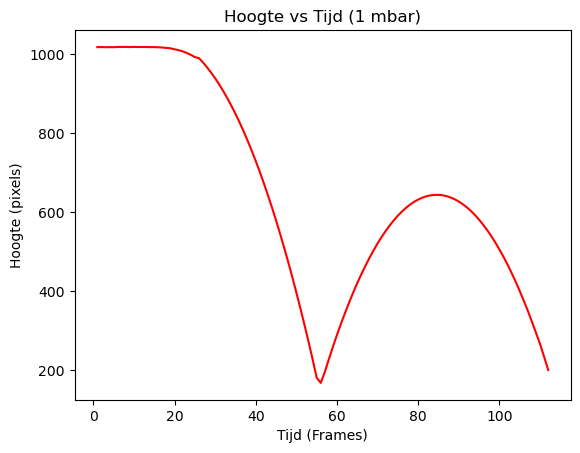

[1018.75409, 1018.592285, 1019.05743, 1019.058556, 1018.897575, 1018.66777, 644.5683]
The CoR bij 1 papiertjes is: 0.6327561536574383
De fout op de CoR is: 0.001633336845548501


In [50]:
analyseer_bestand('22-7_Results_1_30mbar.csv', 1, 5, 6)


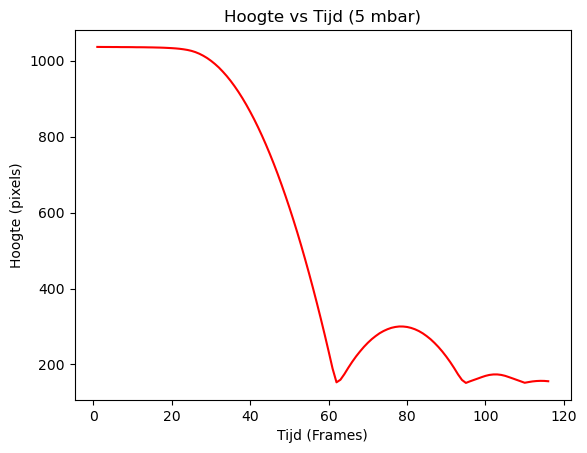

[1035.80361, 1035.531567, 300.06354, 173.85260000000005, 156.95123]
The CoR bij 5 papiertjes is: 0.2897676416270949
De fout op de CoR is: 0.00141361018432906


In [51]:
analyseer_bestand('22-7_Results_5_30mbar.csv', 5, 1, 2)


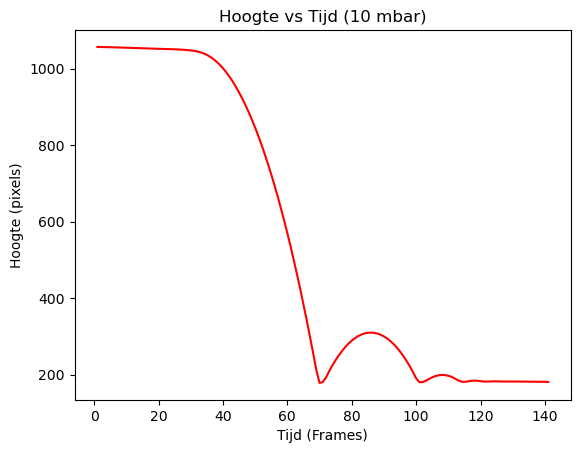

[1056.460854, 309.7318, 199.01306, 184.1508, 182.36519999999996, 181.87354000000005, 181.54859999999996, 181.48739999999998]
The CoR bij 10 papiertjes is: 0.2931786812803194
De fout op de CoR is: 0.001386875811876679


In [52]:
analyseer_bestand('22-7_Results_10_30mbar.csv', 10, 0, 1)


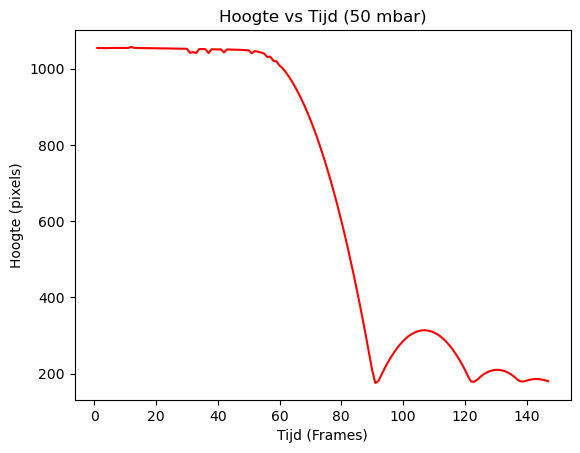

[1054.33707, 1054.340103, 1054.521053, 1054.605785, 1057.17195, 1054.16549, 1053.03019, 1052.47872, 1043.529552, 1051.675, 1051.075603, 1050.80022, 1050.423367, 1046.306244, 1031.71384, 313.87256, 209.87260000000003, 186.01670000000001]
The CoR bij 50 papiertjes is: 0.3042244349460312
De fout op de CoR is: 0.0014244500445767126


In [53]:
analyseer_bestand('22-7_Results_50_30mbar.csv', 50, 14, 15)


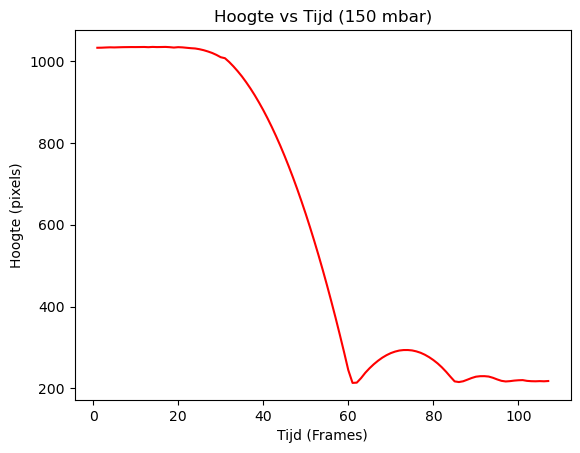

[1033.75383, 1034.408905, 1034.60681, 1034.737656, 1034.74257, 1034.128994, 293.8718, 229.9991, 220.35204999999996, 217.88103999999998]
The CoR bij 150 papiertjes is: 0.28417325276154093
De fout op de CoR is: 0.0014134293971616882


In [54]:
analyseer_bestand('22-7_Results_150_30mbar.csv', 150, 5, 6)


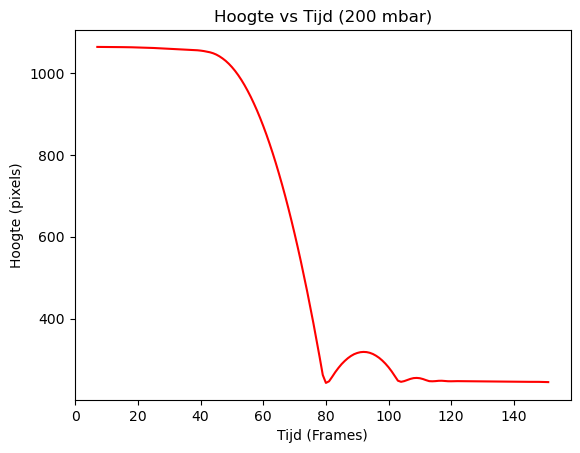

[1063.335443, 1063.279425, 318.91920000000005, 255.45159999999998, 248.53290000000004, 247.59439999999995, 247.17913999999996, 246.76056000000005, 246.586, 245.99614999999994]
The CoR bij 200 papiertjes is: 0.2999392187053747
De fout op de CoR is: 0.0013805237895163094


In [55]:
analyseer_bestand('22-7_Results_200_30mbar.csv', 200, 1, 2)


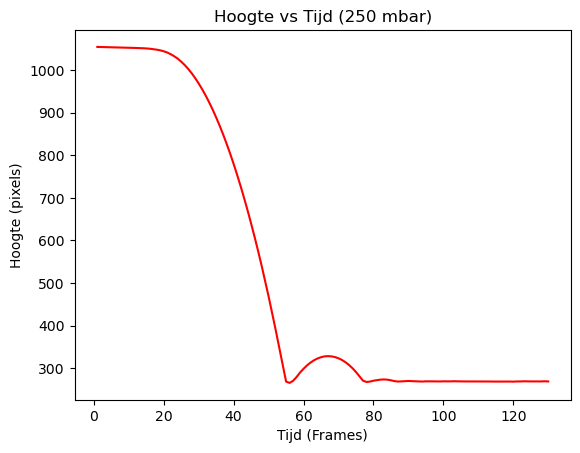

[1054.454712, 328.12620000000004, 273.4371, 269.746, 269.04369999999994, 268.94730000000004, 269.2037, 268.7853, 268.68994, 268.54767000000004, 268.68787, 269.04332999999997, 269.1607]
The CoR bij 250 papiertjes is: 0.31118093196969854
De fout op de CoR is: 0.001396457607724912


In [56]:
analyseer_bestand('22-7_Results_250_30mbar.csv', 250, 0, 1)


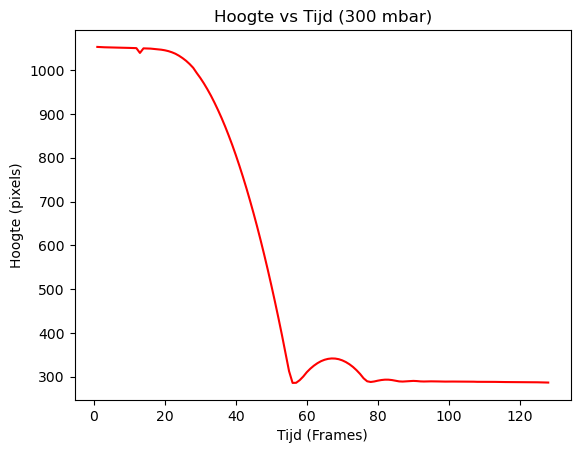

[1053.331234, 1050.046425, 341.3663, 292.881, 290.0585, 289.03467, 288.5833, 288.265, 288.2315, 287.88226, 287.09220000000005]
The CoR bij 300 papiertjes is: 0.3250963880001782
De fout op de CoR is: 0.0014079688665433869


In [57]:
analyseer_bestand('22-7_Results_300_30mbar.csv', 300, 1, 2)


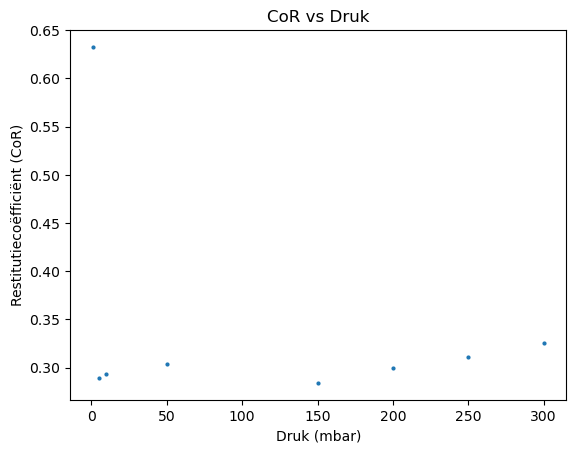

[1, 5, 10, 50, 150, 200, 250, 300]
[0.6327561536574383, 0.2897676416270949, 0.2931786812803194, 0.3042244349460312, 0.28417325276154093, 0.2999392187053747, 0.31118093196969854, 0.3250963880001782]


In [58]:
plt.errorbar(lijst_papier, lijst_CoR, capsize = 5, markersize = 2, fmt='o')
plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk")
plt.show()

print(lijst_papier)
print(lijst_CoR)

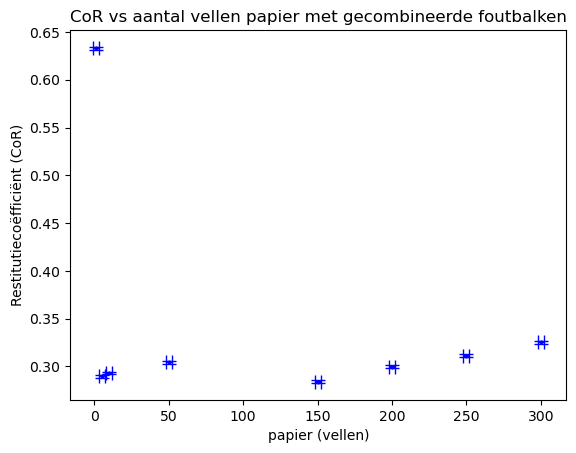

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# aantal lagen papier
lijst_papier = [1, 5, 10, 50, 150, 200, 250, 300]  # mbar


# --- CoR-waarden uit berekeningen ---
lijst_CoR = [0.6327561536574383, 0.2897676416270949, 0.2931786812803194, 0.3042244349460312, 0.28417325276154093, 0.2999392187053747, 0.31118093196969854, 0.3250963880001782]


# Bereken de foutbalken (asymmetrisch)
x_errors = []
for i in range(0,len(lijst_papier)):
    x_errors.append(2)

# Plotten van CoR met foutbalken
for i in range(len(lijst_papier)):
    plt.errorbar(lijst_papier[i], lijst_CoR[i],
                 xerr=np.array(x_errors[i]), yerr = np.array(lijst_fout_CoR[i]), fmt='o', capsize=5, markersize = 2, color='blue')

plt.xlabel("papier (vellen)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs aantal vellen papier met gecombineerde foutbalken")
plt.show()